In [1]:
# Импорты пакетов и библиотек
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import seaborn as sns
sns.set()
import warnings
import xgboost

from sklearn import tree
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
#выведем содержимое рабочей директории и директории с данными
!ls
!ls data/

 data   __pycache__   requirements.txt	 task_1.ipynb  'Тестовое задание.docx'
task2.txt  test_task_NLP.json


In [3]:
#откроем таблицу с данными
data_task_1 = pd.read_table('data/task2.txt')

In [4]:
#Выведем первые пять строк для ознакомления
data_task_1.head()

,0.155050833243877,0.974187332671136,0.0746745388023555,0.442146032350138,0.369443477829918,0.468137626536191,0.578845957759768,0.42274355981499,0.931542937643826,0.474148423643783,15
0,0.968379,0.716820,0.678846,0.510049,0.545299,0.573692,0.817491,0.206636,0.880111,0.574187,17
1,0.468263,0.405603,0.320325,0.468084,0.100995,0.974407,0.300062,0.608356,0.050082,0.762011,12
2,0.776820,0.103740,0.373748,0.797782,0.906810,0.599069,0.626680,0.924705,0.632768,0.512663,16
3,0.407886,0.415357,0.101543,0.935160,0.444124,0.193607,0.656837,0.599929,0.868582,0.405406,20
4,0.538797,0.088621,0.886119,0.781848,0.401623,0.207652,0.946310,0.769453,0.827292,0.937183,15


### Таблица не имеет заголовков колонок. Для удобства откроем её и присвоим колонкам псевдоимена.

In [5]:
data_task_1 = pd.read_table('data/task2.txt',
                           names = ('var_1','var_2','var_3','var_4','var_5',
                                    'var_6','var_7','var_8','var_9','var_10','answer'))

In [6]:
#Выполним первичный обзор датафрейма
data_task_1.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,answer
0,0.155051,0.974187,0.074675,0.442146,0.369443,0.468138,0.578846,0.422744,0.931543,0.474148,15
1,0.968379,0.716820,0.678846,0.510049,0.545299,0.573692,0.817491,0.206636,0.880111,0.574187,17
2,0.468263,0.405603,0.320325,0.468084,0.100995,0.974407,0.300062,0.608356,0.050082,0.762011,12
3,0.776820,0.103740,0.373748,0.797782,0.906810,0.599069,0.626680,0.924705,0.632768,0.512663,16
4,0.407886,0.415357,0.101543,0.935160,0.444124,0.193607,0.656837,0.599929,0.868582,0.405406,20


In [7]:
#Выведем общую информацию о датафрейме
data_task_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var_1   1000 non-null   float64
 1   var_2   1000 non-null   float64
 2   var_3   1000 non-null   float64
 3   var_4   1000 non-null   float64
 4   var_5   1000 non-null   float64
 5   var_6   1000 non-null   float64
 6   var_7   1000 non-null   float64
 7   var_8   1000 non-null   float64
 8   var_9   1000 non-null   float64
 9   var_10  1000 non-null   float64
 10  answer  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


### Датафрейм имеет 1000 строк и 11 колонок. Отсутствуют пропуски в данных. Колонки с признаками имеют тип данных float, колонка с целевой переменной имеет целочисленный тип данных. 

In [8]:
#Посмотрим описательные статистики датафрейма
data_task_1.describe()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,answer
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.490491,0.499785,0.496466,0.503167,0.508902,0.513466,0.487111,0.498870,0.505611,0.499113,15.014000
std,0.293920,0.278833,0.298024,0.284102,0.283300,0.291059,0.288407,0.285954,0.283131,0.284073,4.771223
min,0.000188,0.000085,0.003110,0.001223,0.005314,0.000517,0.000493,0.000408,0.007883,0.000170,3.000000
25%,0.218825,0.262168,0.231492,0.268925,0.274572,0.255524,0.237778,0.256103,0.262332,0.249675,12.000000
50%,0.504439,0.500901,0.484347,0.503412,0.508629,0.527155,0.475274,0.501300,0.518847,0.509422,15.000000
75%,0.738004,0.734516,0.764729,0.747587,0.742461,0.766870,0.738885,0.736849,0.748473,0.741870,18.000000
max,0.999566,0.999959,0.998918,0.998785,0.998478,0.999059,0.999179,0.998646,0.998884,0.998819,29.000000


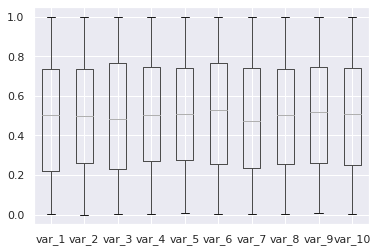

In [9]:
#Также описательные статистики можно представить в графическом виде с помощью графика boxplot 
boxplot = data_task_1.boxplot(column=['var_1','var_2', 'var_3','var_4','var_5',
                                      'var_6','var_7','var_8', 'var_9', 'var_10'])

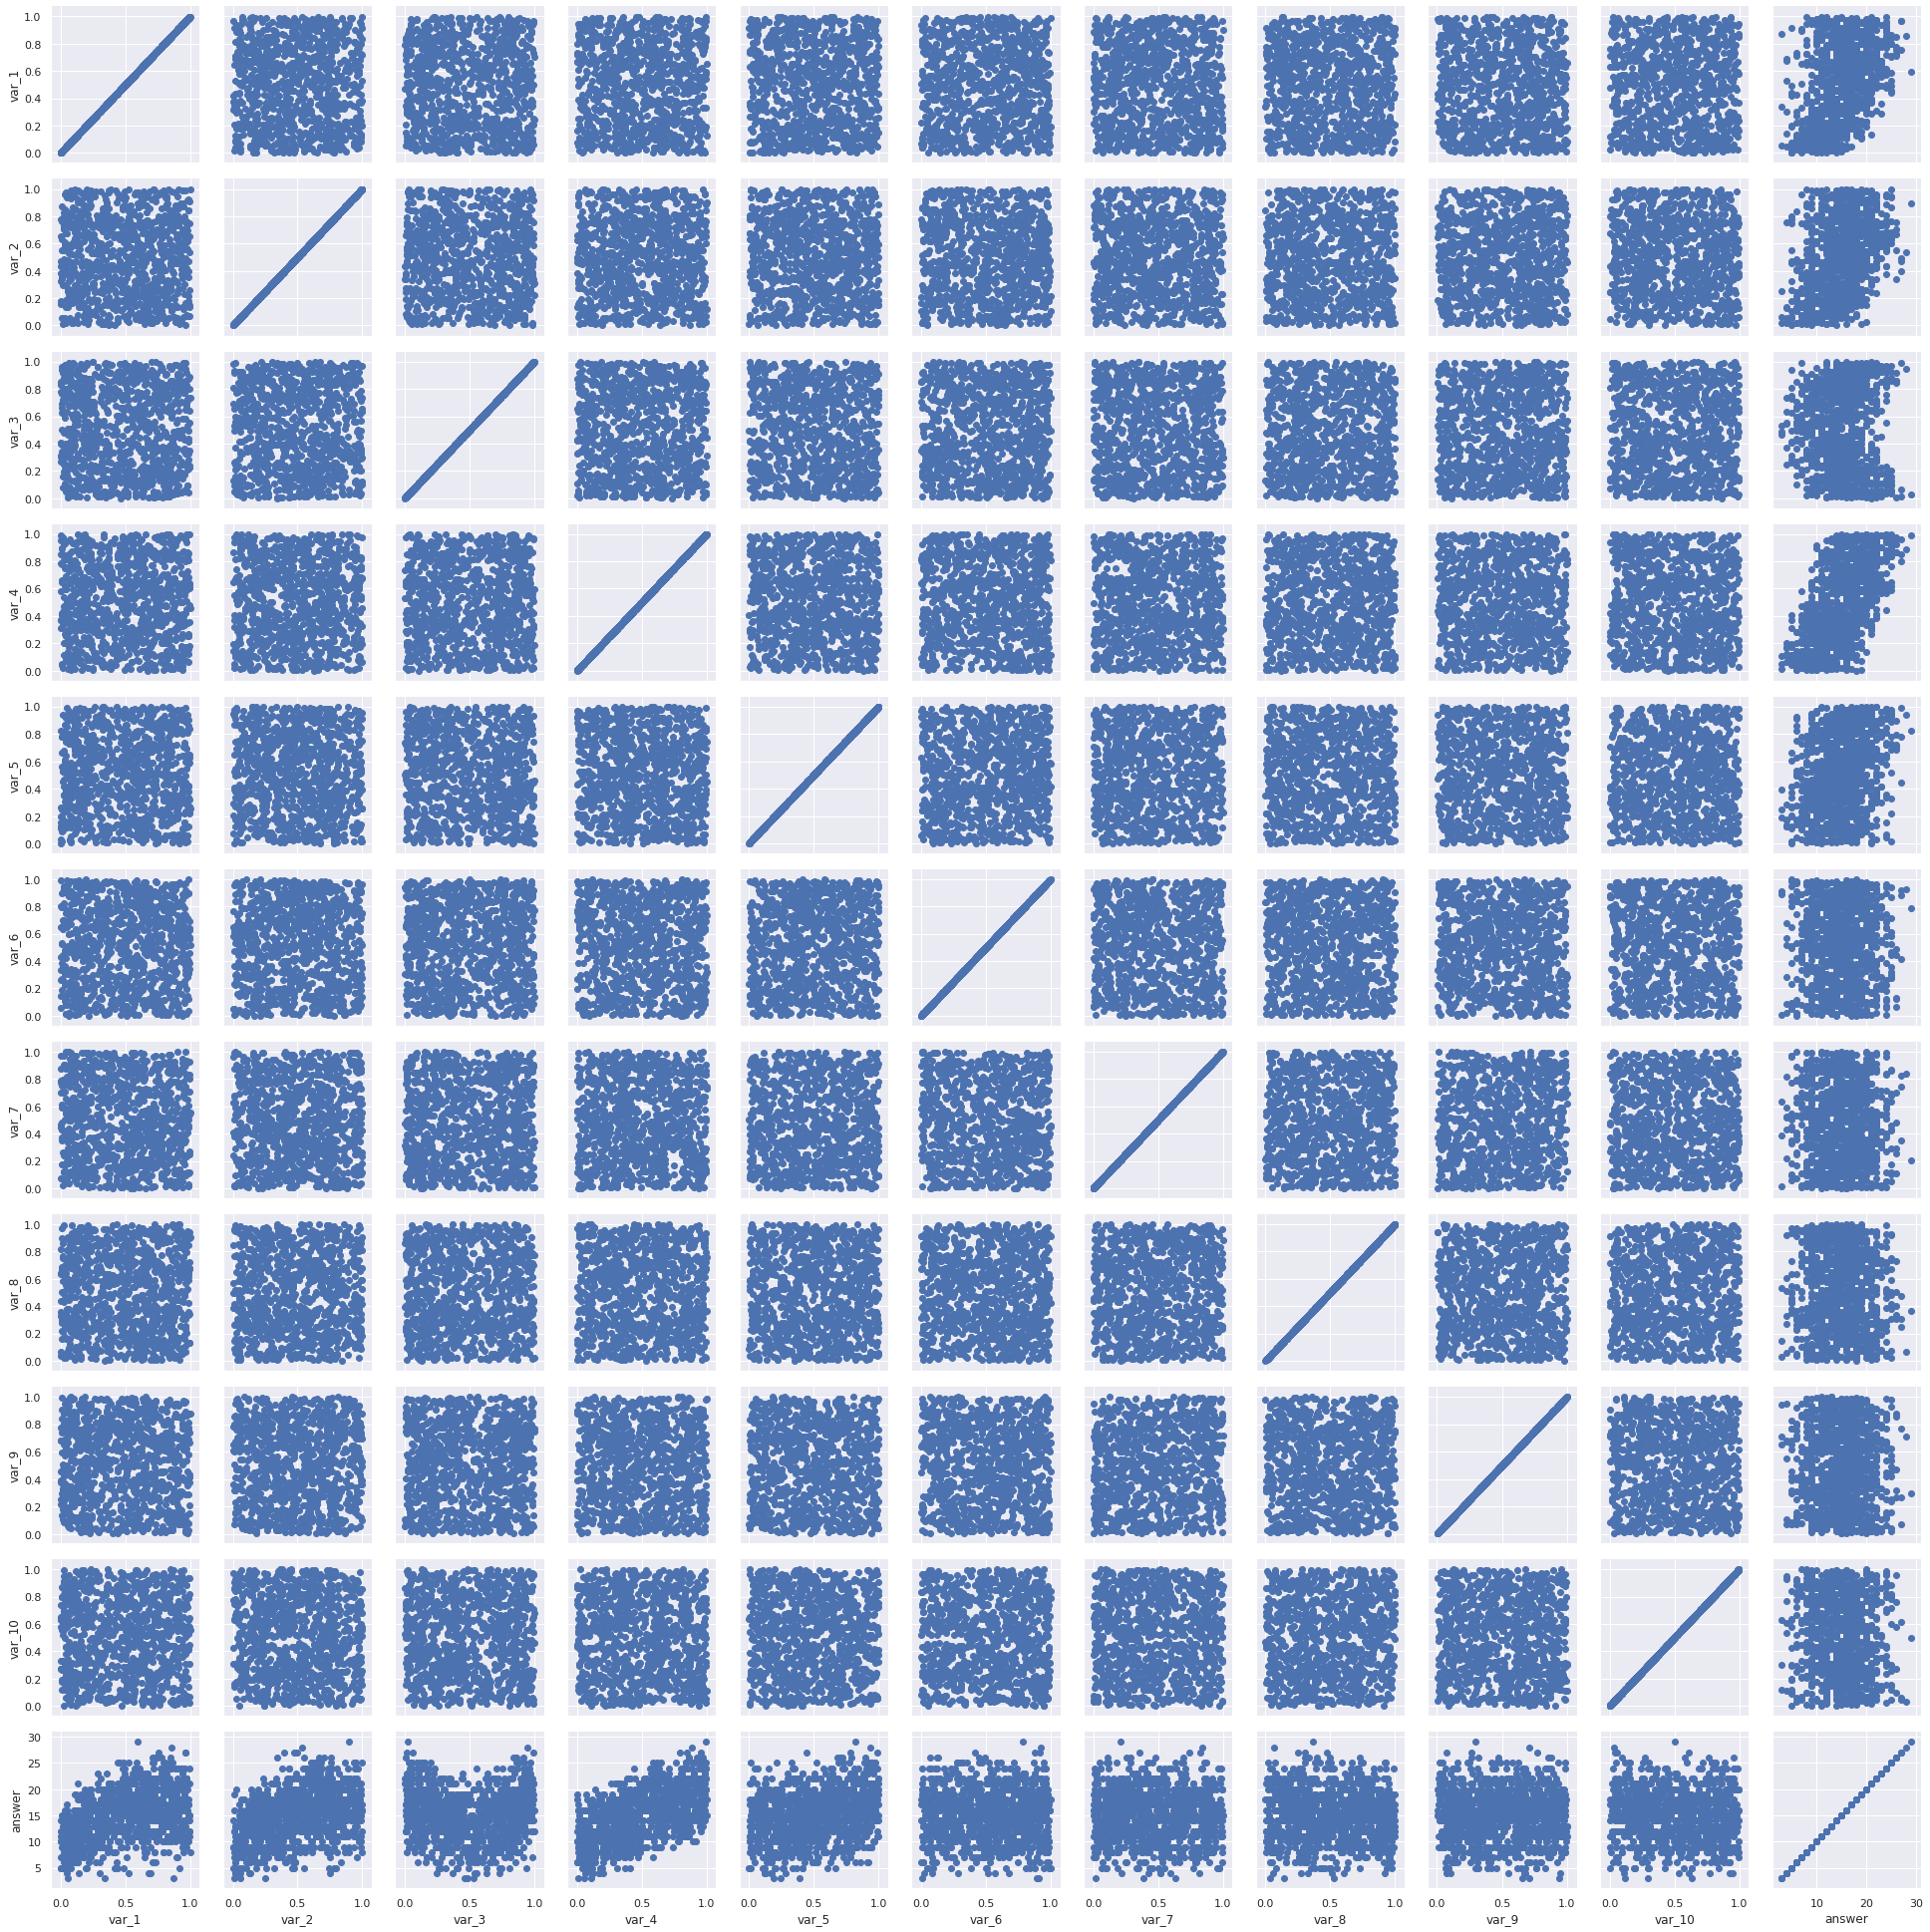

In [10]:
#Построим график pairplot, чтобы визуально оценить влияние признаков друг на друга
pair_grid_plot = sns.PairGrid(data_task_1)
pair_grid_plot.map(plt.scatter)

### На полученном графике незаметна зависимость признаков друг на друга. Похоже, что линейная связь между ними практически отсутствует.

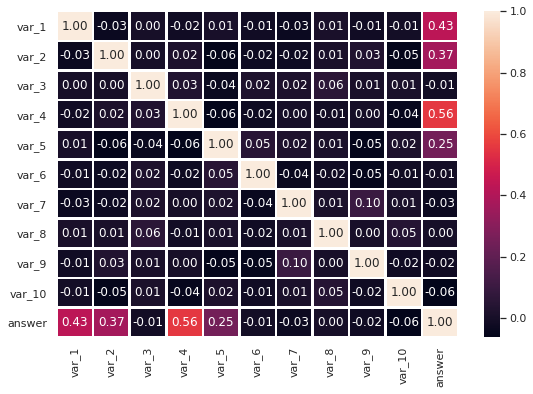

In [11]:
#Построим матрицу корреляции для аналитической оценки влияния признаков друг на друга
corr_matrix = data_task_1.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr_matrix, annot=True, linewidths = 1.5, fmt = '.2f', ax=ax)
plt.show()

### Матрица корелляции показывает, что коэффициенты зависимости между признаками малы. Есть смысл оставлять все признаки для анализа. Могу предположить, что такой характер данных косвенно намекает нам, что они были сгенерированны вручную.

### В соответствии с техническим заданием необходимо выполнить построение статистической модели для зависимости:
$$answer = f(\text{var_1},\text{var_2},\text{var_3},\text{var_4},\text{var_5},\text{var_6},\text{var_7},\text{var_8},\text{var_9},\text{var_10}),$$
### где: answer - целевая переменная, var_1 ... var_10 - признаки.

In [12]:
#Отделим от нашей выборки прогнозные значения
X = data_task_1.copy()
y = X.pop("answer")

In [13]:
#Проверим, правильно ли прошло разбиение
X.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
0,0.155051,0.974187,0.074675,0.442146,0.369443,0.468138,0.578846,0.422744,0.931543,0.474148
1,0.968379,0.716820,0.678846,0.510049,0.545299,0.573692,0.817491,0.206636,0.880111,0.574187
2,0.468263,0.405603,0.320325,0.468084,0.100995,0.974407,0.300062,0.608356,0.050082,0.762011
3,0.776820,0.103740,0.373748,0.797782,0.906810,0.599069,0.626680,0.924705,0.632768,0.512663
4,0.407886,0.415357,0.101543,0.935160,0.444124,0.193607,0.656837,0.599929,0.868582,0.405406


In [14]:
y.head()

0    15
1    17
2    12
3    16
4    20
Name: answer, dtype: int64

### Для построения модели выберем несколько основных методов машинного обучения: линейную регрессию, random forest, логистическую регрессию, метод опорных векторов, решающее дерево и алгоритм градиентного бустинга.

### Для оценки моделей необходимо выбрать критерий. В качестве такого критерия выберем коэффициент детерминации (R-квадрат). Его можно вычислить по формуле:
$$R^2 = 1-\cfrac{V(y|x)}{V(y)} = 1- \cfrac{\sigma^2}{\sigma^2_{y}},
$$
где $V(y|x) = \sigma^2$ - условная дисперсия зависимой величины у по фактору х.

### Коэффициент варьируется в пределах 0...1 и чем ближе к единице, тем сильнее зависимость. 

In [15]:
#Инициализация моделей
models = [LinearRegression(), # линейная регрессия
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
          SVR(kernel='linear'), # метод опорных векторов с лиейным ядром
          LogisticRegression(), # логистическая регрессия
          tree.DecisionTreeRegressor(),# решающее дерево
          xgboost.XGBRegressor(eval_metric='mlogloss')] # градиентный бустинг

In [16]:
#Выполним разбиение датасета на тренировочное и тестовое множества. Разбиение задаётся параметром test_size.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3)

### Для получения списка наиболее значащих коэффициентов необходимо обучить модель и вызвать метод, который их выдаст. Для алгоритмов  линейной регрессии, ближайших соседей, опорных векторов и логистической регрессии это метод coef_, а для random forest, решающего дерева и градиентного бустинга это метод feature_importances_. 
### Для автоматизации получения значимых коэффициентов напишем функцию

In [17]:
def get_feature_importances(model):
    """Функция для получения коэффициентов регрессии 
        из обученной модели
        input: model
        output: list[coef_1...coef_x]"""
    name_model = str(model).split(sep='(')[0]
    feature_list = []
    if name_model == 'LinearRegression' \
        or name_model == 'KNeighborsRegressor':
            feature_list = model.coef_
    elif name_model == 'LogisticRegression'\
        or name_model == 'SVR':
        feature_list = model.coef_[0]
    elif name_model == 'RandomForestRegressor' \
        or name_model == 'DecisionTreeRegressor' \
        or name_model == 'XGBRegressor':
        feature_list = model.feature_importances_
    else:
        print('Name model is not defined')
    return feature_list

In [18]:
#Создаём сводный датасет
test_models = DataFrame({'model':[], 'r_score':[]}) 
feature_importances = DataFrame()
for var in X.columns:
    feature_importances[var] = [] 
main_data_frame = pd.concat([test_models, feature_importances], axis = 1)

for model in models:
    #получаем имя модели
    m = str(model)
    name_model = m.split(sep='(')[0]
    # обучаем модель
    model.fit(Xtrain, Ytrain) 
    
    #вычисляем коэффициент детерминации
    det_coef = r2_score(Ytest, model.predict(Xtest))
    #Вычисляем значимость коэффициентов
    importances = get_feature_importances(model)
    #Добавляем значения в сводный датасет
    main_data_frame.loc[len(main_data_frame)] = [name_model] + [det_coef] +   list(importances)
#Настроим индексы в сводном датасете
main_data_frame.set_index('model', inplace=True)

In [19]:
#Выведем сводный датасет
main_data_frame

,r_score,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
model,,,,,,,,,,,
LinearRegression,0.760944,7.205791,6.766705,-0.304174,9.574327,5.134670,-0.006702,-0.290040,-0.055054,-0.378243,-0.268434
RandomForestRegressor,0.833151,0.219349,0.187367,0.077685,0.284783,0.090650,0.028864,0.027105,0.028252,0.027422,0.028523
SVR,0.755930,7.903288,6.825615,-0.173215,8.988315,4.870469,-0.272165,-0.251204,-0.047354,-0.040250,-0.002884
LogisticRegression,0.536674,-0.223579,-0.969418,-0.004446,-1.118543,-0.590746,0.222977,-0.357331,-0.588403,0.648380,-0.362234
DecisionTreeRegressor,0.675106,0.259659,0.240458,0.047439,0.318842,0.070064,0.018169,0.007252,0.011114,0.018368,0.008634
XGBRegressor,0.904276,0.168470,0.199882,0.103027,0.430576,0.074322,0.005211,0.003633,0.002736,0.004963,0.007179


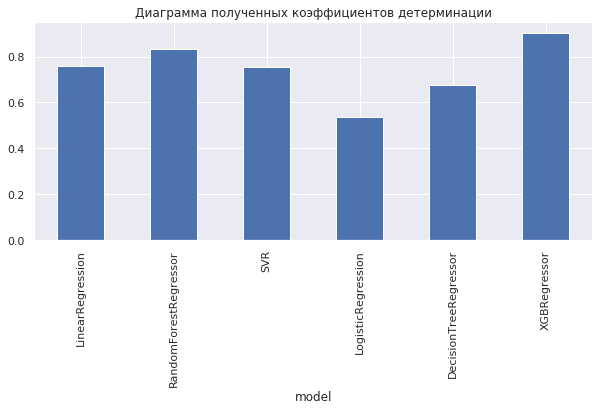

In [20]:
#Построим столбчатую диаграмму для отображения полученных коэффициентов детерминации
fig, axes = plt.subplots(ncols=1, figsize=(10,4))
main_data_frame['r_score'].plot(kind='bar', title='Диаграмма полученных коэффициентов детерминации')

In [21]:
#Транспонируем датасет для удобства
main_data_frame_transponce = main_data_frame.T

In [22]:
# Выведем полученный датасет
main_data_frame_transponce

model,LinearRegression,RandomForestRegressor,SVR,LogisticRegression,DecisionTreeRegressor,XGBRegressor
r_score,0.760944,0.833151,0.755930,0.536674,0.675106,0.904276
var_1,7.205791,0.219349,7.903288,-0.223579,0.259659,0.168470
var_2,6.766705,0.187367,6.825615,-0.969418,0.240458,0.199882
var_3,-0.304174,0.077685,-0.173215,-0.004446,0.047439,0.103027
var_4,9.574327,0.284783,8.988315,-1.118543,0.318842,0.430576
var_5,5.134670,0.090650,4.870469,-0.590746,0.070064,0.074322
var_6,-0.006702,0.028864,-0.272165,0.222977,0.018169,0.005211
var_7,-0.290040,0.027105,-0.251204,-0.357331,0.007252,0.003633
var_8,-0.055054,0.028252,-0.047354,-0.588403,0.011114,0.002736
var_9,-0.378243,0.027422,-0.040250,0.648380,0.018368,0.004963


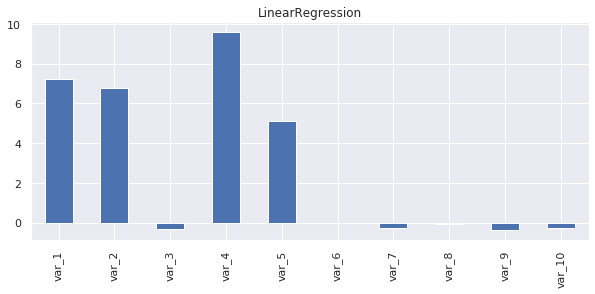

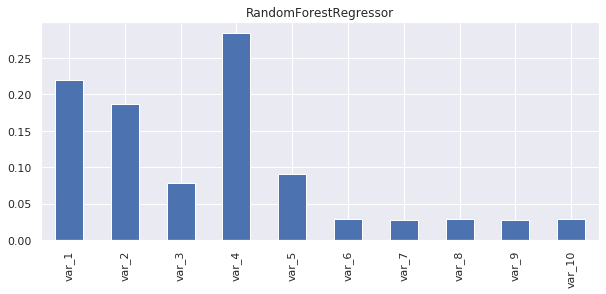

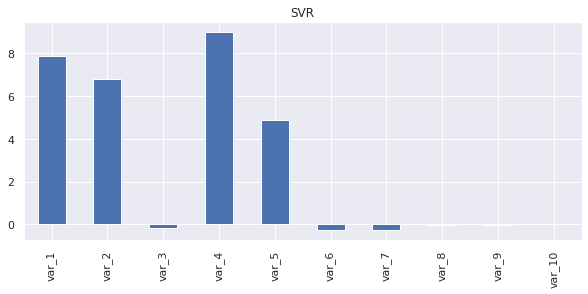

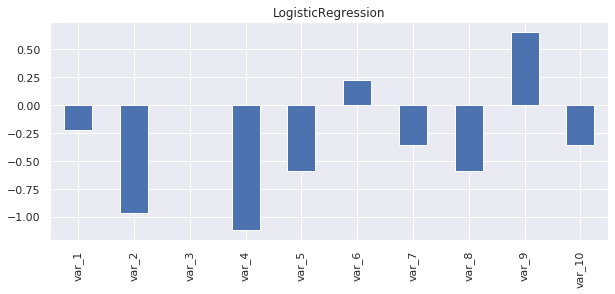

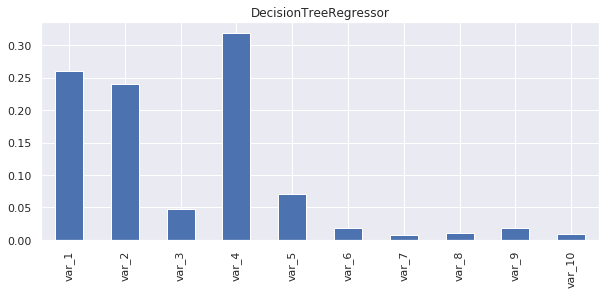

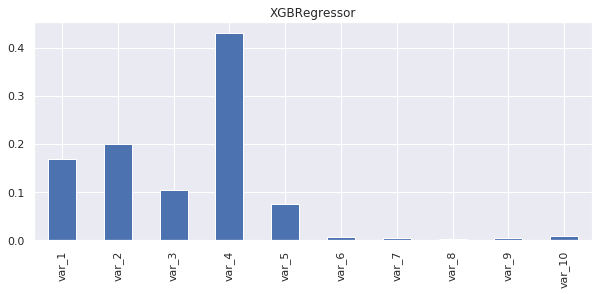

In [23]:
#Выведем уровень значимых коэффициентов в виде диаграмм
for alg in list(main_data_frame_transponce.columns):
    fig, axes = plt.subplots(ncols=1, figsize=(10,4))
    main_data_frame_transponce[alg][1:].plot(kind='bar', title=alg)

### Для улучшения полученного результата можно предпринять следующие шаги:

 - Выяснить по максимуму всю историю получения признаков и что они означают. Трудно работать с данными, когда не имеешь ни малейшего представления об их природе происхождения;
 - Отсеять малозначимые признаки и сгенерировать новые на оставшихся;
 - "Потюнить" гиперпараметры используемых алгоритмов. А в идеале применить алгоритм наподобие grid_search_cv библиотеки sklearn для их автоматического подбора. Примененные алгоритмы в данном задании были запущены с использованием гиперпараметров по умолчанию.